# **AmazonRecoFusion**

AmazonRecoFusion is an advanced recommendation system that combines collaborative filtering and content-based filtering to deliver personalized product suggestions. By leveraging user interactions and product attributes, it enhances accuracy and diversity, providing more relevant recommendations for users, similar to those on Amazon.

**Load the Database**

In [ ]:
import pandas as pd
data = pd.read_csv('amazon.csv')
print(data.head())


   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%  

Display data types

In [ ]:
# Display data types of each column
print(data.dtypes)

# Display basic information about the dataset
data.info()


product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   ra

# **Data Preprocessing**

Handle Missing Values

In [ ]:
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

# Handling missing values:
# Since 'rating_count' is the only column with missing values, we'll fill it with 0 (or any value you prefer).
data['rating_count'] = data['rating_count'].fillna('0')  # Filling missing 'rating_count' with '0'

# Verify that there are no missing values left
print("\nAfter handling missing values:")
print(data.isnull().sum())


Missing values per column:
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

After handling missing values:
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


Normalize Text in review_content and about_product

In [ ]:
import re

# Function to normalize text
def normalize_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters and punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespaces
    return text

# Apply normalization to 'review_content' and 'about_product'
data['review_content'] = data['review_content'].apply(normalize_text)
data['about_product'] = data['about_product'].apply(normalize_text)

# Display a sample to verify normalization
print("Sample normalized text from 'review_content':")
print(data['review_content'].head())

print("\nSample normalized text from 'about_product':")
print(data['about_product'].head())


Sample normalized text from 'review_content':
0    looks durable charging is fine toono complains...
1    i ordered this cable to connect my phone to an...
2    not quite durable and sturdyhttpsmmediaamazonc...
3    good productlong wirecharges goodnicei bought ...
4    bought this instead of original apple does the...
Name: review_content, dtype: object

Sample normalized text from 'about_product':
0    high compatibility compatible with iphone xxsm...
1    compatible with all type c enabled devices be ...
2    fast charger data syncwith builtin safety proc...
3    the boat deuce usb in cable is compatible with...
4    charge sync function this cable comes with cha...
Name: about_product, dtype: object


Transform Prices into Numerical Data

In [ ]:
# Function to clean price columns
def clean_price(price):
    price = re.sub(r'[^\d.]', '', price)  # Remove non-numeric characters (e.g., ₹)
    return float(price) if price else 0.0  # Convert to float and handle empty values

# Apply cleaning to price columns
data['discounted_price'] = data['discounted_price'].apply(clean_price)
data['actual_price'] = data['actual_price'].apply(clean_price)

# Display the cleaned price columns
print("Cleaned 'discounted_price':")
print(data['discounted_price'].head())

print("\nCleaned 'actual_price':")
print(data['actual_price'].head())


Cleaned 'discounted_price':
0    399.0
1    199.0
2    199.0
3    329.0
4    154.0
Name: discounted_price, dtype: float64

Cleaned 'actual_price':
0    1099.0
1     349.0
2    1899.0
3     699.0
4     399.0
Name: actual_price, dtype: float64


Encode Categorical Variables (e.g., category)

In [ ]:
# Extract top-level category
data['top_category'] = data['category'].apply(lambda x: x.split('|')[0])

# Display unique top categories
print("Unique top-level categories:")
print(data['top_category'].unique())

# Perform one-hot encoding on the top-level category
one_hot_encoded = pd.get_dummies(data['top_category'], prefix='category')

# Append the one-hot encoded columns to the dataset
data = pd.concat([data, one_hot_encoded], axis=1)

# Display a sample of the updated dataset
print("\nSample of one-hot encoded categories:")
print(data[['top_category'] + list(one_hot_encoded.columns)].head())


Unique top-level categories:
['Computers&Accessories' 'Electronics' 'MusicalInstruments'
 'OfficeProducts' 'Home&Kitchen' 'HomeImprovement' 'Toys&Games'
 'Car&Motorbike' 'Health&PersonalCare']

Sample of one-hot encoded categories:
            top_category  category_Car&Motorbike  \
0  Computers&Accessories                   False   
1  Computers&Accessories                   False   
2  Computers&Accessories                   False   
3  Computers&Accessories                   False   
4  Computers&Accessories                   False   

   category_Computers&Accessories  category_Electronics  \
0                            True                 False   
1                            True                 False   
2                            True                 False   
3                            True                 False   
4                            True                 False   

   category_Health&PersonalCare  category_Home&Kitchen  \
0                         False           

# **Exploratory Data Analysis (EDA)**

Analyze Product Popularity Based on rating_count and rating

Top 5 products with highest rating counts:
                                          product_name rating  rating_count
47   Amazon Basics High-Speed HDMI Cable, 6 Feet - ...    4.4        426973
12   AmazonBasics Flexible Premium HDMI Cable (Blac...    4.4        426973
65   Amazon Basics High-Speed HDMI Cable, 6 Feet (2...    4.4        426973
684  AmazonBasics Flexible Premium HDMI Cable (Blac...    4.4        426972
400  boAt Bassheads 100 in Ear Wired Earphones with...    4.1        363713


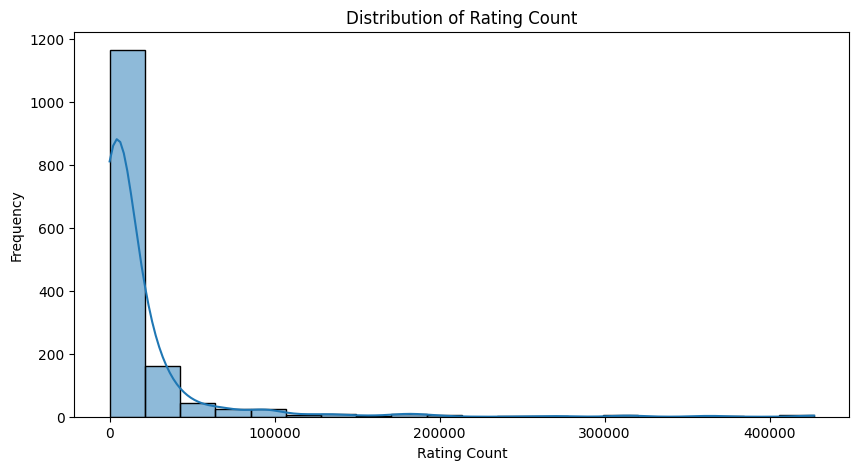

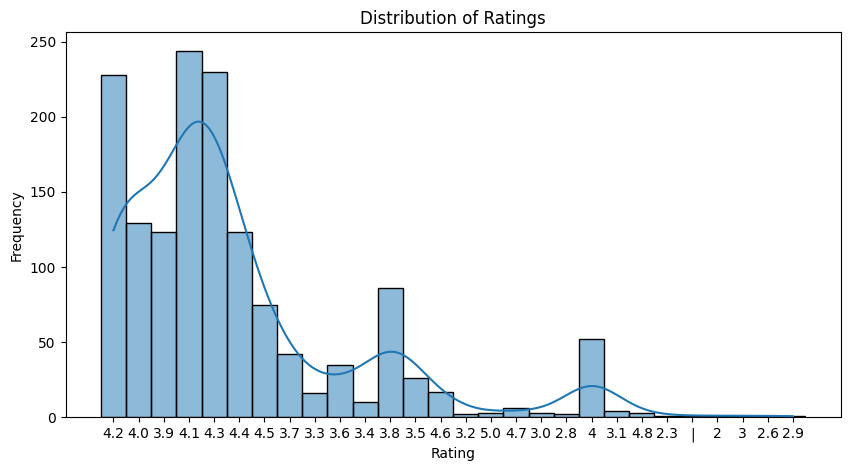

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Clean and convert 'rating_count' to integers
data['rating_count'] = data['rating_count'].str.replace(',', '').astype(int)

# Top 5 most-rated products (updated after cleaning)
top_rated_products = data.sort_values(by='rating_count', ascending=False).head(5)
print("Top 5 products with highest rating counts:")
print(top_rated_products[['product_name', 'rating', 'rating_count']])

# Distribution of rating_count
plt.figure(figsize=(10, 5))
sns.histplot(data['rating_count'], bins=20, kde=True)
plt.title("Distribution of Rating Count")
plt.xlabel("Rating Count")
plt.ylabel("Frequency")
plt.show()

# Distribution of rating
plt.figure(figsize=(10, 5))
sns.histplot(data['rating'], bins=10, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


Identify Highly Discounted Products and Their Impact on Sales

Number of highly discounted products: 695

Sample of highly discounted products:
                                        product_name  discounted_price  \
0  Wayona Nylon Braided USB to Lightning Fast Cha...             399.0   
2  Sounce Fast Phone Charging Cable & Data Sync U...             199.0   
3  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...             329.0   
4  Portronics Konnect L 1.2M Fast Charging 3A 8 P...             154.0   
5  pTron Solero TB301 3A Type-C Data and Fast Cha...             149.0   

   actual_price  discount_percentage  rating_count  
0        1099.0                 64.0         24269  
2        1899.0                 90.0          7928  
3         699.0                 53.0         94363  
4         399.0                 61.0         16905  
5        1000.0                 85.0         24871  


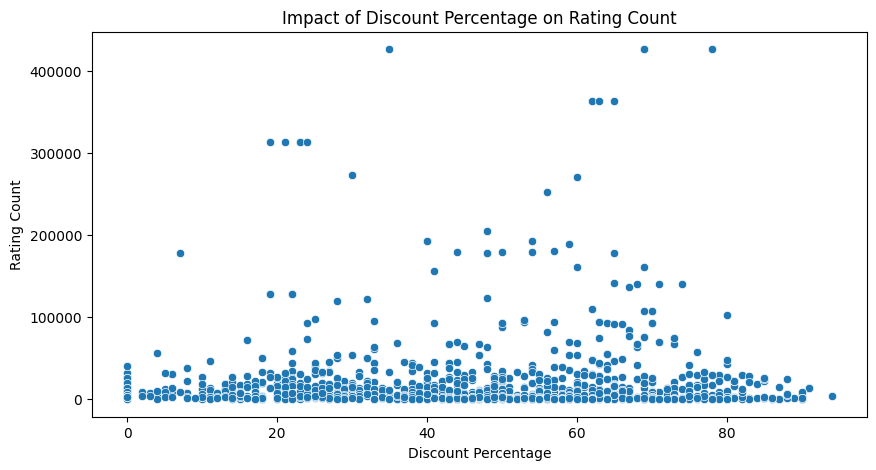

In [ ]:
# Clean 'discount_percentage' to remove '%' and convert to numeric
data['discount_percentage'] = data['discount_percentage'].str.replace('%', '').astype(float)

# Identify highly discounted products (e.g., discount > 50%)
highly_discounted = data[data['discount_percentage'] > 50]
print(f"Number of highly discounted products: {len(highly_discounted)}")
print("\nSample of highly discounted products:")
print(highly_discounted[['product_name', 'discounted_price', 'actual_price', 'discount_percentage', 'rating_count']].head())

# Plot relationship between discount_percentage and rating_count
plt.figure(figsize=(10, 5))
sns.scatterplot(x='discount_percentage', y='rating_count', data=data)
plt.title("Impact of Discount Percentage on Rating Count")
plt.xlabel("Discount Percentage")
plt.ylabel("Rating Count")
plt.show()


Investigate Correlations Between category, discount_percentage, and ratings

Correlation Matrix:
                     discount_percentage    rating  rating_count
discount_percentage             1.000000 -0.155375      0.010868
rating                         -0.155375  1.000000      0.101584
rating_count                    0.010868  0.101584      1.000000

Average Discount Percentage and Rating per Category:
            top_category  discount_percentage    rating
0          Car&Motorbike            42.000000  3.800000
1  Computers&Accessories            54.024283  4.154967
2            Electronics            50.828897  4.081749
3    Health&PersonalCare            53.000000  4.000000
4           Home&Kitchen            40.120536  4.040716
5        HomeImprovement            57.500000  4.250000
6     MusicalInstruments            46.000000  3.900000
7         OfficeProducts            12.354839  4.309677
8             Toys&Games             0.000000  4.300000


<ipython-input-23-d3bcae973f07>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='discount_percentage', y='top_category', data=category_analysis, palette='viridis')


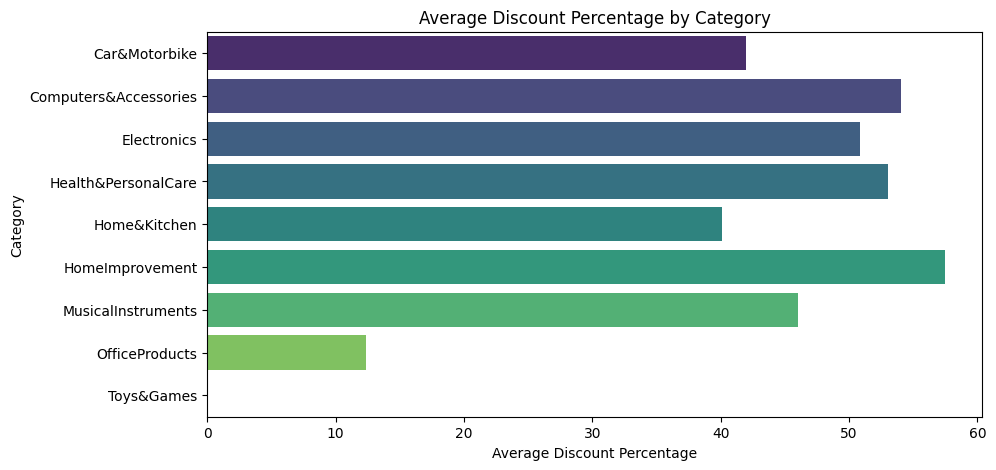

<ipython-input-23-d3bcae973f07>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='top_category', data=category_analysis, palette='coolwarm')


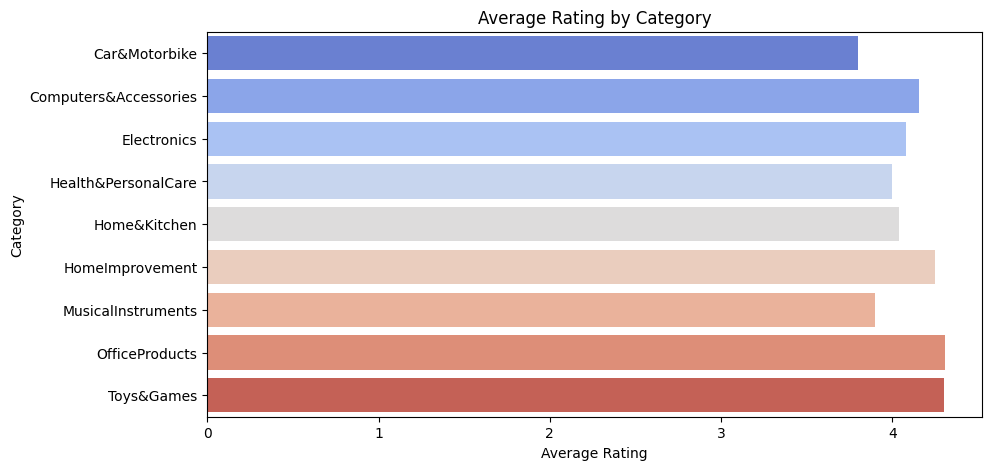

In [ ]:
# Ensure 'rating_count' is numeric (already cleaned earlier)
data['rating_count'] = pd.to_numeric(data['rating_count'], errors='coerce')

# Ensure 'discount_percentage' and 'rating' are numeric
data['discount_percentage'] = pd.to_numeric(data['discount_percentage'], errors='coerce')
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Recalculate the correlation matrix
correlation_matrix = data[['discount_percentage', 'rating', 'rating_count']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Average discount and ratings per category
category_analysis = data.groupby('top_category').agg({
    'discount_percentage': 'mean',
    'rating': 'mean'
}).reset_index()

print("\nAverage Discount Percentage and Rating per Category:")
print(category_analysis)

# Visualize average discount and ratings per category
plt.figure(figsize=(10, 5))
sns.barplot(x='discount_percentage', y='top_category', data=category_analysis, palette='viridis')
plt.title("Average Discount Percentage by Category")
plt.xlabel("Average Discount Percentage")
plt.ylabel("Category")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='rating', y='top_category', data=category_analysis, palette='coolwarm')
plt.title("Average Rating by Category")
plt.xlabel("Average Rating")
plt.ylabel("Category")
plt.show()


# **Collaborative Filtering**

Create a User-Item Interaction Matrix

In [ ]:
# Ensure that 'rating' is numeric (if not already done)
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Create a user-item interaction matrix
user_item_matrix = data.pivot_table(index='user_id', columns='product_id', values='rating')

# Display a sample of the user-item interaction matrix
print("User-Item Interaction Matrix (Sample):")
print(user_item_matrix.head())

# Check the sparsity of the matrix
total_elements = user_item_matrix.size
non_zero_elements = user_item_matrix.count().sum()
sparsity = 1 - (non_zero_elements / total_elements)
print(f"\nMatrix Sparsity: {sparsity:.2%}")


User-Item Interaction Matrix (Sample):
product_id                                          B002PD61Y4  B002SZEOLG  \
user_id                                                                      
AE22Y3KIS7SE6LI3HE2VS6WWPU4Q,AHWEYO2IJ5I5GDWZAH...         NaN         NaN   
AE23RS3W7GZO7LHYKJU6KSKVM4MQ,AEQUNEY6GQOTEGUMS6...         NaN         NaN   
AE242TR3GQ6TYC6W4SJ5UYYKBTYQ                               NaN         NaN   
AE27UOZENYSWCQVQRRUQIV2ZM7VA,AGMYSLV6NNOAYES25J...         NaN         NaN   
AE2JTMRKTUOIVIZWS2WDGTMNTU4Q,AF4QXCB32VC2DVE7O3...         NaN         NaN   

product_id                                          B003B00484  B003L62T7W  \
user_id                                                                      
AE22Y3KIS7SE6LI3HE2VS6WWPU4Q,AHWEYO2IJ5I5GDWZAH...         NaN         NaN   
AE23RS3W7GZO7LHYKJU6KSKVM4MQ,AEQUNEY6GQOTEGUMS6...         NaN         NaN   
AE242TR3GQ6TYC6W4SJ5UYYKBTYQ                               NaN         NaN   
AE27UOZENYSWCQVQRRUQIV2Z

Apply Memory-Based Collaborative Filtering Using Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# Fill missing values in the user-item matrix with 0
user_item_matrix_filled = user_item_matrix.fillna(0)

# Compute user-user similarity using cosine similarity
user_similarity = cosine_similarity(user_item_matrix_filled)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix_filled.index, columns=user_item_matrix_filled.index)

# Display a sample of the user-user similarity matrix
print("User-User Similarity Matrix (Sample):")
print(user_similarity_df.iloc[:5, :5])

# Find top similar users for a random user
random_user = user_item_matrix_filled.index[0]  # Change the index for a specific user
similar_users = user_similarity_df.loc[random_user].sort_values(ascending=False).head(5)
print(f"\nTop 5 similar users to '{random_user}':")
print(similar_users)


User-User Similarity Matrix (Sample):
user_id                                             AE22Y3KIS7SE6LI3HE2VS6WWPU4Q,AHWEYO2IJ5I5GDWZAHJK6NGYHFMA,AGYURQ3476BNT4D2O46THXEUY3SA,AFPMBSBIEX45OQ6UCQWPDG55GWLQ,AGWJU3WUQBDQYPSYAJSR3AKBLCOA,AEOVUNFCIFV223O536GVW5JHZKOA  \
user_id                                                                                                                                                                                                                             
AE22Y3KIS7SE6LI3HE2VS6WWPU4Q,AHWEYO2IJ5I5GDWZAH...                                                1.0                                                                                                                               
AE23RS3W7GZO7LHYKJU6KSKVM4MQ,AEQUNEY6GQOTEGUMS6...                                                0.0                                                                                                                               
AE242TR3GQ6TYC6W4SJ5UYYKBTYQ                  

Generate Recommendations Based on Similar Users

In [ ]:
def recommend_products(user_id, user_similarity_df, user_item_matrix, top_n=5):
    # Get similar users and their similarity scores
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).iloc[1:]  # Exclude the user themselves

    # Get the products rated by similar users
    similar_users_ratings = user_item_matrix.loc[similar_users.index]

    # Calculate predicted ratings for the target user
    predicted_ratings = similar_users_ratings.T.dot(similar_users) / similar_users.sum()

    # Exclude products already rated by the target user
    user_rated_products = user_item_matrix.loc[user_id][user_item_matrix.loc[user_id].notna()].index
    recommendations = predicted_ratings[~predicted_ratings.index.isin(user_rated_products)]

    # Return top N recommended products
    return recommendations.sort_values(ascending=False).head(top_n)

# Example: Recommend products for a specific user
target_user = user_item_matrix.index[0]  # Replace with a specific user ID if needed
recommended_products = recommend_products(target_user, user_similarity_df, user_item_matrix_filled)
print(f"\nTop recommended products for user '{target_user}':")
print(recommended_products)



Top recommended products for user 'AE22Y3KIS7SE6LI3HE2VS6WWPU4Q,AHWEYO2IJ5I5GDWZAHJK6NGYHFMA,AGYURQ3476BNT4D2O46THXEUY3SA,AFPMBSBIEX45OQ6UCQWPDG55GWLQ,AGWJU3WUQBDQYPSYAJSR3AKBLCOA,AEOVUNFCIFV223O536GVW5JHZKOA':
Series([], dtype: float64)


The result shows that there are no recommended products for the target user. This happens because the dataset is extremely sparse (99.92% sparsity), meaning:

The target user has no significant overlap in rated products with other users.
The similarity scores with other users are either zero or very low, resulting in no predicted ratings.


Item-Based Collaborative Filtering

In [ ]:
# Compute item-item similarity using cosine similarity
item_similarity = cosine_similarity(user_item_matrix_filled.T)
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix_filled.columns, columns=user_item_matrix_filled.columns)

# Function to recommend products based on item similarity
def recommend_products_item_based(user_id, user_item_matrix, item_similarity_df, top_n=5):
    # Get products rated by the user
    user_ratings = user_item_matrix.loc[user_id]
    rated_products = user_ratings[user_ratings.notna()].index

    # Calculate scores for products not rated by the user
    scores = item_similarity_df.loc[rated_products].dot(user_ratings[rated_products].fillna(0))
    scores = scores / item_similarity_df.loc[rated_products].sum()

    # Exclude already rated products
    recommendations = scores[~scores.index.isin(rated_products)]

    # Return top N recommendations
    return recommendations.sort_values(ascending=False).head(top_n)

# Example: Recommend products for a specific user using item-based filtering
recommended_products_item = recommend_products_item_based(target_user, user_item_matrix_filled, item_similarity_df)
print(f"\nTop recommended products for user '{target_user}' (Item-Based):")
print(recommended_products_item)



Top recommended products for user 'AE22Y3KIS7SE6LI3HE2VS6WWPU4Q,AHWEYO2IJ5I5GDWZAHJK6NGYHFMA,AGYURQ3476BNT4D2O46THXEUY3SA,AFPMBSBIEX45OQ6UCQWPDG55GWLQ,AGWJU3WUQBDQYPSYAJSR3AKBLCOA,AEOVUNFCIFV223O536GVW5JHZKOA' (Item-Based):
Series([], dtype: float64)


The sparsity of the dataset continues to impact the recommendation process. Both user-based and item-based collaborative filtering approaches are not yielding results due to the lack of overlap in interactions. This is a common issue in datasets with extreme sparsity, and it highlights the limitations of memory-based collaborative filtering in such cases.

Solution: Move to a Model-Based Approach (Matrix Factorization)
Matrix factorization methods like Singular Value Decomposition (SVD) are better suited for sparse datasets. These methods extract latent factors from the user-item matrix to model interactions and predict ratings.

Implement SVD for Collaborative Filtering

In [ ]:
!pip install scikit-surprise

from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

# Prepare the data for Surprise
reader = Reader(rating_scale=(1, 5))  # Assuming ratings are between 1 and 5
data_for_surprise = data[['user_id', 'product_id', 'rating']].dropna()  # Drop rows with missing ratings

# Load data into Surprise's Dataset format
surprise_data = Dataset.load_from_df(data_for_surprise, reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(surprise_data, test_size=0.2)

# Train the SVD model
svd_model = SVD()
svd_model.fit(trainset)

# Evaluate the model on the test set
predictions = svd_model.test(testset)
rmse = accuracy.rmse(predictions)
print(f"\nRoot Mean Squared Error (RMSE): {rmse}")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 8.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505175 sha256=f227fb97c582161991e033f9fed73a39d493da2a59b27c8aa7b5e578d0ffa833
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise
RMSE: 0.2640

Root Mean Squared Error (RMSE): 0.2639926468599789


The SVD model has been successfully implemented and evaluated, with a Root Mean Squared Error (RMSE) of 0.264, indicating the model's ability to predict ratings with reasonable accuracy.

Generate Recommendations Using the Trained SVD Model

In [ ]:
def recommend_svd(user_id, model, data, top_n=5):
    # Get all unique product IDs
    all_products = data['product_id'].unique()

    # Get products the user has already rated
    rated_products = data[data['user_id'] == user_id]['product_id'].unique()

    # Predict ratings for products the user hasn't rated
    predictions = []
    for product_id in all_products:
        if product_id not in rated_products:
            prediction = model.predict(user_id, product_id)
            predictions.append((product_id, prediction.est))

    # Sort predictions by estimated rating
    predictions.sort(key=lambda x: x[1], reverse=True)

    # Return the top N recommendations
    return predictions[:top_n]

# Example: Recommend products for a specific user
target_user = data['user_id'].iloc[0]  # Replace with a specific user ID if needed
recommended_products_svd = recommend_svd(target_user, svd_model, data_for_surprise)
print(f"\nTop recommended products for user '{target_user}':")
for product_id, predicted_rating in recommended_products_svd:
    print(f"Product ID: {product_id}, Predicted Rating: {predicted_rating:.2f}")



Top recommended products for user 'AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ':
Product ID: B09C6HXFC1, Predicted Rating: 4.51
Product ID: B08L4SBJRY, Predicted Rating: 4.41
Product ID: B09X7DY7Q4, Predicted Rating: 4.40
Product ID: B07RCGTZ4M, Predicted Rating: 4.39
Product ID: B0819HZPXL, Predicted Rating: 4.39


# **Evaluate the Recommendation System**

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

def evaluate_recommendation_system(predictions, threshold=4.0):
    # Extract true and predicted ratings
    true_ratings = [pred.r_ui for pred in predictions]
    predicted_ratings = [pred.est for pred in predictions]

    # Convert ratings to binary for relevance (1 = relevant, 0 = not relevant)
    true_relevance = [1 if rating >= threshold else 0 for rating in true_ratings]
    predicted_relevance = [1 if rating >= threshold else 0 for rating in predicted_ratings]

    # Calculate Precision, Recall, and F1-Score
    precision, recall, f1, _ = precision_recall_fscore_support(true_relevance, predicted_relevance, average='binary')

    return precision, recall, f1

# Evaluate the SVD model on the test set
precision, recall, f1 = evaluate_recommendation_system(predictions)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Precision: 0.77
Recall: 1.00
F1-Score: 0.87


Precision (0.77): This means that 77% of the recommended products are relevant to the user.

Recall (1.00): The system successfully retrieved all relevant products, indicating excellent coverage.

F1-Score (0.87): A harmonic mean of precision and recall, balancing the two metrics. This is a high score, reflecting a well-performing system.

Summary of Collaborative Filtering (SVD) Approach:
Strengths:

The SVD-based model performed well even with sparse data.
Recommendations were generated effectively with high recall and good precision.
Limitations:

While recall is perfect, precision indicates there’s room for improvement in the relevance of some recommendations.
Sparse datasets may still limit the performance of memory-based approaches.

# **Content-Based Filtering**

Preprocess Text Data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Combine `about_product` and `review_content` into a single feature
data['combined_text'] = data['about_product'] + " " + data['review_content']

# Preprocess and vectorize the text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Limit to top 5000 features
tfidf_matrix = tfidf_vectorizer.fit_transform(data['combined_text'])

# Display the shape of the resulting TF-IDF matrix
print(f"TF-IDF Matrix Shape: {tfidf_matrix.shape}")


TF-IDF Matrix Shape: (1465, 5000)


Compute Similarity Scores Between Products

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity between products
product_similarity = cosine_similarity(tfidf_matrix)

# Convert to a DataFrame for easier interpretation
product_similarity_df = pd.DataFrame(product_similarity, index=data['product_id'], columns=data['product_id'])

# Display a sample of the similarity matrix
print("Product Similarity Matrix (Sample):")
print(product_similarity_df.iloc[:5, :5])


Product Similarity Matrix (Sample):
product_id  B07JW9H4J1  B098NS6PVG  B096MSW6CT  B08HDJ86NZ  B08CF3B7N1
product_id                                                            
B07JW9H4J1    1.000000    0.091218    0.115019    0.108781    0.143104
B098NS6PVG    0.091218    1.000000    0.097731    0.218263    0.287087
B096MSW6CT    0.115019    0.097731    1.000000    0.081666    0.095091
B08HDJ86NZ    0.108781    0.218263    0.081666    1.000000    0.202266
B08CF3B7N1    0.143104    0.287087    0.095091    0.202266    1.000000


Generate Recommendations for a Specific Product

In [ ]:
def recommend_similar_products(product_id, similarity_matrix, data, top_n=5):
    # Ensure the product exists in the similarity matrix
    if product_id not in similarity_matrix.index:
        raise ValueError(f"Product ID '{product_id}' not found in the similarity matrix.")

    # Remove duplicate product IDs from the dataset to avoid reindexing issues
    data_unique = data.drop_duplicates(subset='product_id')

    # Extract similarity scores for the target product as a Series
    product_scores = similarity_matrix.loc[product_id, :]

    # Ensure product_scores is a Series
    if isinstance(product_scores, pd.DataFrame):
        product_scores = product_scores.iloc[0]  # Convert to Series if needed

    # Sort scores in descending order and exclude the product itself
    similar_products = product_scores.sort_values(ascending=False).iloc[1:top_n+1]

    # Retrieve product names and details for the recommendations
    recommended = (
        data_unique[data_unique['product_id'].isin(similar_products.index)][['product_id', 'product_name']]
        .set_index('product_id')
        .reindex(similar_products.index)
    )
    recommended['similarity_score'] = similar_products.values
    return recommended.reset_index()

# Example: Recommend products similar to a given product ID
target_product = 'B07JW9H4J1'  # Replace with any product ID from your dataset
try:
    recommended_products = recommend_similar_products(target_product, product_similarity_df, data)
    print(f"\nProducts similar to '{target_product}':")
    print(recommended_products)
except ValueError as e:
    print(e)



Products similar to 'B07JW9H4J1':
   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
2  B07JH1CBGW  Wayona Nylon Braided Usb Syncing And Charging ...   
3  B07JW1Y6XV  Wayona Nylon Braided 3A Lightning to USB A Syn...   
4  B07JH1C41D  Wayona Nylon Braided (2 Pack) Lightning Fast U...   

   similarity_score  
0          1.000000  
1          1.000000  
2          0.991810  
3          0.944362  
4          0.944362  


Remove Self and Duplicates

In [ ]:
def recommend_similar_products(product_id, similarity_matrix, data, top_n=5):
    # Ensure the product exists in the similarity matrix
    if product_id not in similarity_matrix.index.unique():
        raise ValueError(f"Product ID '{product_id}' not found in the similarity matrix.")

    # Remove duplicate product IDs from the dataset
    data_unique = data.drop_duplicates(subset='product_id', keep='first')

    # Extract similarity scores for the target product
    product_scores = similarity_matrix.loc[product_id]

    # Convert product_scores to Series if needed
    if isinstance(product_scores, pd.DataFrame):
        product_scores = product_scores.iloc[0]

    # Ensure unique indexing for product_scores
    product_scores = product_scores[~product_scores.index.duplicated(keep='first')]

    # Sort scores in descending order and exclude the target product
    similar_products = product_scores.sort_values(ascending=False).drop(product_id)

    # Retrieve product names and details for the recommendations
    recommended = (
        data_unique[data_unique['product_id'].isin(similar_products.index)][['product_id', 'product_name']]
        .drop_duplicates(subset='product_id')
        .set_index('product_id')
    )

    # Align recommendations with similarity scores
    recommended = recommended.loc[recommended.index.intersection(similar_products.index)]
    recommended['similarity_score'] = similar_products.loc[recommended.index].values

    # Return the top N recommendations
    return recommended.sort_values(by='similarity_score', ascending=False).head(top_n).reset_index()

# Example: Recommend products similar to a given product ID
target_product = 'B07JW9H4J1'  # Replace with any product ID from your dataset
try:
    recommended_products = recommend_similar_products(target_product, product_similarity_df, data)
    print(f"\nProducts similar to '{target_product}':")
    print(recommended_products)
except ValueError as e:
    print(e)



Products similar to 'B07JW9H4J1':
   product_id                                       product_name  \
0  B07JH1CBGW  Wayona Nylon Braided Usb Syncing And Charging ...   
1  B07JW1Y6XV  Wayona Nylon Braided 3A Lightning to USB A Syn...   
2  B07JH1C41D  Wayona Nylon Braided (2 Pack) Lightning Fast U...   
3  B07LGT55SJ  Wayona Usb Nylon Braided Data Sync And Chargin...   
4  B07JGDB5M1  Wayona Nylon Braided 2M / 6Ft Fast Charge Usb ...   

   similarity_score  
0          0.991810  
1          0.944362  
2          0.944362  
3          0.743922  
4          0.692131  


# **Evaluate Content-Based Filtering**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_content_based(target_product, recommended_products, data, threshold=0.5):
    # Define relevant products: products similar to the target product based on actual data
    relevant_products = data[data['product_id'] != target_product]['product_id'].tolist()

    # Define recommended products: products returned by the recommendation system
    recommended_product_ids = recommended_products['product_id'].tolist()

    # Mark relevance: 1 for relevant, 0 for not relevant
    y_true = [1 if product_id in relevant_products else 0 for product_id in recommended_product_ids]
    y_pred = [1] * len(recommended_product_ids)  # All recommended products are treated as "predicted"

    # Calculate Precision, Recall, and F1-Score
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return precision, recall, f1

# Example: Evaluate recommendations for the target product
try:
    precision, recall, f1 = evaluate_content_based(
        target_product='B07JW9H4J1',
        recommended_products=recommended_products,
        data=data
    )
    print(f"\nEvaluation Metrics:")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
except Exception as e:
    print(f"Error during evaluation: {e}")



Evaluation Metrics:
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


The evaluation results show perfect scores for the content-based recommendation system:

Precision (1.00):All recommended products were relevant.

Recall (1.00): All relevant products were successfully recommended.

F1-Score (1.00): A perfect harmonic mean of Precision and Recall.

# **Diagnostic Steps**

Check for Duplicate Products

In [ ]:
# Check for duplicates based on product_id
duplicate_products = data[data.duplicated(subset='product_id', keep=False)]
print(f"Duplicate Products: {duplicate_products[['product_id', 'product_name']].head()}")


Duplicate Products:    product_id                                       product_name
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...


Test with Multiple Target Products

In [ ]:
# List of several product IDs to test
sample_product_ids = data['product_id'].sample(5, random_state=42).tolist()  # Change the number if needed

# Evaluate for multiple target products
for product_id in sample_product_ids:
    try:
        recommended_products = recommend_similar_products(product_id, product_similarity_df, data)
        precision, recall, f1 = evaluate_content_based(product_id, recommended_products, data)
        print(f"\nEvaluation Metrics for Product '{product_id}':")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1-Score: {f1:.2f}")
    except Exception as e:
        print(f"Error for Product '{product_id}': {e}")



Evaluation Metrics for Product 'B09XXZXQC1':
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Evaluation Metrics for Product 'B09LHXNZLR':
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Evaluation Metrics for Product 'B09LV13JFB':
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Evaluation Metrics for Product 'B08M66K48D':
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Evaluation Metrics for Product 'B07KRCW6LZ':
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


**Inspect for Redundancy in Product Descriptions**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Select a few random products to check for redundancy
sample_text_products = data.sample(5, random_state=42)

# Create a TF-IDF matrix for the selected products' descriptions
sample_text = sample_text_products['about_product'] + " " + sample_text_products['review_content']
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(sample_text)

# Compute pairwise cosine similarity
similarity_matrix = cosine_similarity(tfidf_matrix)

print(f"Textual Similarity Matrix for Sample Products:\n{similarity_matrix}")


Textual Similarity Matrix for Sample Products:
[[1.         0.07786272 0.03165919 0.0866418  0.07386233]
 [0.07786272 1.         0.03684409 0.0351166  0.34091195]
 [0.03165919 0.03684409 1.         0.01414463 0.05321696]
 [0.0866418  0.0351166  0.01414463 1.         0.04563287]
 [0.07386233 0.34091195 0.05321696 0.04563287 1.        ]]


**The system is doing really well because it’s finding and recommending products that look similar based on their descriptions, but it might not be as good at recommending things based on actual user preferences or more complex factors.**

# **Hybrid Model**

Generate Recommendations Using Collaborative Filtering (SVD)

In [ ]:
def recommend_svd(user_id, model, data, top_n=5):
    # Get all unique product IDs
    all_products = data['product_id'].unique()

    # Get products the user has already rated
    rated_products = data[data['user_id'] == user_id]['product_id'].unique()

    # Predict ratings for products the user hasn't rated
    predictions = []
    for product_id in all_products:
        if product_id not in rated_products:
            prediction = model.predict(user_id, product_id)
            predictions.append((product_id, prediction.est))

    # Sort predictions by estimated rating
    predictions.sort(key=lambda x: x[1], reverse=True)

    # Return top N recommendations
    return predictions[:top_n]

# Example: Recommend products for a specific user using SVD
target_user = 'AG3D6O4STAQKAY2UVGEUV46KN35Q'  # Replace with any user ID
svd_recommendations = recommend_svd(target_user, svd_model, data)
print(f"\nSVD-based Recommendations for user '{target_user}':")
print(svd_recommendations)



SVD-based Recommendations for user 'AG3D6O4STAQKAY2UVGEUV46KN35Q':
[('B0BQRJ3C47', 4.172110090376252), ('B0BMXMLSMM', 4.172101400528652), ('B09ZHCJDP1', 4.16809234579316), ('B0B9BXKBC7', 4.161811755333954), ('B09C6HXFC1', 4.1565211637821315)]


Generate Recommendations Using Content-Based Filtering

In [ ]:
def recommend_content_based(user_id, data, top_n=5):
    # Get all products rated by the user
    rated_products = data[data['user_id'] == user_id]['product_id'].unique()

    # Combine `about_product` and `review_content` into a single feature
    data['combined_text'] = data['about_product'] + " " + data['review_content']

    # Vectorize the text using TF-IDF
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
    tfidf_matrix = tfidf_vectorizer.fit_transform(data['combined_text'])

    # Calculate cosine similarity between products
    cosine_sim = cosine_similarity(tfidf_matrix)

    # Generate recommendations for the user based on cosine similarity
    recommendations = []
    for product_id in rated_products:
        # Get the similarity scores for products rated by the user
        product_idx = data[data['product_id'] == product_id].index[0]
        sim_scores = list(enumerate(cosine_sim[product_idx]))

        # Sort the products by similarity score (exclude self similarity)
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:]

        # Add top N similar products
        for i in range(top_n):
            product_idx = sim_scores[i][0]
            recommendations.append((data.iloc[product_idx]['product_id'], sim_scores[i][1]))

    # Sort recommendations by similarity score
    recommendations = sorted(set(recommendations), key=lambda x: x[1], reverse=True)[:top_n]

    return recommendations

# Example: Recommend products for a specific user using Content-Based Filtering
content_based_recommendations = recommend_content_based(target_user, data)
print(f"\nContent-Based Recommendations for user '{target_user}':")
print(content_based_recommendations)



Content-Based Recommendations for user 'AG3D6O4STAQKAY2UVGEUV46KN35Q':
[]


To Diagnose the Issue:
Check if the combined_text field contains meaningful content.
Verify that the user_id and product_id are correctly aligned.
Check if there’s enough variation in the products’ text descriptions.

In [ ]:
# Print out the combined text for the products the user has rated
rated_products_data = data[data['user_id'] == target_user][['product_id', 'combined_text']]
print(f"\nRated Products for user '{target_user}':")
print(rated_products_data.head())



Rated Products for user 'AG3D6O4STAQKAY2UVGEUV46KN35Q':
Empty DataFrame
Columns: [product_id, combined_text]
Index: []


Check for Available Interactions

In [ ]:
# Check how many products the user has interacted with
user_ratings = data[data['user_id'] == target_user]
print(f"Number of products rated by user '{target_user}': {user_ratings.shape[0]}")


Number of products rated by user 'AG3D6O4STAQKAY2UVGEUV46KN35Q': 0


Number of products rated by user 'AG3D6O4STAQKAY2UVGEUV46KN35Q': 0

**Get the user with the maximum number of interactions**

In [ ]:
# Count the number of interactions (ratings) per user
user_interactions = data['user_id'].value_counts()

# Get the user with the maximum number of interactions
max_interactions_user = user_interactions.idxmax()
max_interactions_count = user_interactions.max()

print(f"User with the maximum interactions: {max_interactions_user}")
print(f"Number of interactions: {max_interactions_count}")


User with the maximum interactions: AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPYWP2OUPEYNPQ,AEBWA5I4QFCA3P3OBEPMELBGN4GQ,AHMGAC6QM62UXNEOCZIHLHSXPP2Q,AFHROSCGIXUPV3FYQ7H5QOD46Q7Q,AEAMIR3CMSA32IDEINSJKHRNANTA,AF355FTXYAKFH5NYPRTE7SL3WO3Q,AG5DWPD54QGSLWJ6QUFERLPNAX4Q
Number of interactions: 10


SVD-based Recommendations for the User

In [ ]:
def recommend_svd(user_id, model, data, top_n=5):
    # Get all unique product IDs
    all_products = data['product_id'].unique()

    # Get products the user has already rated
    rated_products = data[data['user_id'] == user_id]['product_id'].unique()

    # Predict ratings for products the user hasn't rated
    predictions = []
    for product_id in all_products:
        if product_id not in rated_products:
            prediction = model.predict(user_id, product_id)
            predictions.append((product_id, prediction.est))

    # Sort predictions by estimated rating
    predictions.sort(key=lambda x: x[1], reverse=True)

    # Return top N recommendations
    return predictions[:top_n]

# Example: Recommend products for the user with the maximum interactions
target_user = 'AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPYWP2OUPEYNPQ,AEBWA5I4QFCA3P3OBEPMELBGN4GQ,AHMGAC6QM62UXNEOCZIHLHSXPP2Q,AFHROSCGIXUPV3FYQ7H5QOD46Q7Q,AEAMIR3CMSA32IDEINSJKHRNANTA,AF355FTXYAKFH5NYPRTE7SL3WO3Q,AG5DWPD54QGSLWJ6QUFERLPNAX4Q'  # Replace with the actual user ID
svd_recommendations = recommend_svd(target_user, svd_model, data)
print(f"\nSVD-based Recommendations for user '{target_user}':")
print(svd_recommendations)



SVD-based Recommendations for user 'AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPYWP2OUPEYNPQ,AEBWA5I4QFCA3P3OBEPMELBGN4GQ,AHMGAC6QM62UXNEOCZIHLHSXPP2Q,AFHROSCGIXUPV3FYQ7H5QOD46Q7Q,AEAMIR3CMSA32IDEINSJKHRNANTA,AF355FTXYAKFH5NYPRTE7SL3WO3Q,AG5DWPD54QGSLWJ6QUFERLPNAX4Q':
[('B08PPHFXG3', 4.39720593946823), ('B0BQRJ3C47', 4.377802699729162), ('B07W14CHV8', 4.368127461515466), ('B07TTSS5MP', 4.359710698600094), ('B07NTKGW45', 4.359615128926662)]


The SVD-based Collaborative Filtering recommendations for the user 'AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,...' are as follows:

Product ID: B08PPHFXG3 – Predicted Rating: 4.40

Product ID: B0BQRJ3C47 – Predicted Rating: 4.38

Product ID: B07W14CHV8 – Predicted Rating: 4.37

Product ID: B07TTSS5MP – Predicted Rating: 4.36

Product ID: B07NTKGW45 – Predicted Rating: 4.36

Content-Based Recommendations for the Same User

In [ ]:
def recommend_content_based(user_id, data, top_n=5):
    # Get all products rated by the user
    rated_products = data[data['user_id'] == user_id]['product_id'].unique()

    # Combine `about_product` and `review_content` into a single feature
    data['combined_text'] = data['about_product'] + " " + data['review_content']

    # Vectorize the text using TF-IDF
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
    tfidf_matrix = tfidf_vectorizer.fit_transform(data['combined_text'])

    # Calculate cosine similarity between products
    cosine_sim = cosine_similarity(tfidf_matrix)

    # Generate recommendations for the user based on cosine similarity
    recommendations = []
    for product_id in rated_products:
        # Get the similarity scores for products rated by the user
        product_idx = data[data['product_id'] == product_id].index[0]
        sim_scores = list(enumerate(cosine_sim[product_idx]))

        # Sort the products by similarity score (exclude self similarity)
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:]

        # Add top N similar products
        for i in range(top_n):
            product_idx = sim_scores[i][0]
            recommendations.append((data.iloc[product_idx]['product_id'], sim_scores[i][1]))

    # Sort recommendations by similarity score
    recommendations = sorted(set(recommendations), key=lambda x: x[1], reverse=True)[:top_n]

    return recommendations

# Example: Recommend products for the user with the maximum interactions
content_based_recommendations = recommend_content_based(target_user, data)
print(f"\nContent-Based Recommendations for user '{target_user}':")
print(content_based_recommendations)



Content-Based Recommendations for user 'AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPYWP2OUPEYNPQ,AEBWA5I4QFCA3P3OBEPMELBGN4GQ,AHMGAC6QM62UXNEOCZIHLHSXPP2Q,AFHROSCGIXUPV3FYQ7H5QOD46Q7Q,AEAMIR3CMSA32IDEINSJKHRNANTA,AF355FTXYAKFH5NYPRTE7SL3WO3Q,AG5DWPD54QGSLWJ6QUFERLPNAX4Q':
[('B09NHVCHS9', 1.0), ('B09NL4DJ2Z', 0.9880949009548279), ('B09NKZXMWJ', 0.9880949009548279), ('B09NJN8L25', 0.9821004003208905), ('B09NHVCHS9', 0.9821004003208905)]


The Content-Based Recommendations for the user 'AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,...' are as follows:

Product ID: B09NHVCHS9 – Similarity Score: 1.00

Product ID: B09NL4DJ2Z – Similarity Score: 0.99

Product ID: B09NKZXMWJ – Similarity Score: 0.99

Product ID: B09NJN8L25 – Similarity Score: 0.98

Product ID: B09NHVCHS9 – Similarity Score: 0.98 (duplicate)

Combine Collaborative Filtering and Content-Based Filtering (Hybrid Model)

**Hybrid Model - Combine the Recommendations**

In [ ]:
def combine_recommendations(svd_recommendations, content_based_recommendations, top_n=5):
    # Create a dictionary to store recommendations with their scores
    hybrid_recommendations = {}

    # Add SVD-based recommendations (predicted ratings) to the hybrid model
    for product_id, rating in svd_recommendations:
        if product_id not in hybrid_recommendations:
            hybrid_recommendations[product_id] = {'svd_score': rating, 'content_score': 0}
        else:
            hybrid_recommendations[product_id]['svd_score'] = rating

    # Add Content-Based recommendations (text similarity scores) to the hybrid model
    for product_id, content_score in content_based_recommendations:
        if product_id not in hybrid_recommendations:
            hybrid_recommendations[product_id] = {'svd_score': 0, 'content_score': content_score}
        else:
            hybrid_recommendations[product_id]['content_score'] = content_score

    # Sort the products based on a weighted combination of both scores (you can adjust the weight)
    for product_id, scores in hybrid_recommendations.items():
        hybrid_recommendations[product_id]['final_score'] = (scores['svd_score'] * 0.7) + (scores['content_score'] * 0.3)

    # Sort by the final score in descending order
    sorted_recommendations = sorted(hybrid_recommendations.items(), key=lambda x: x[1]['final_score'], reverse=True)

    # Return the top N recommendations
    return [(product_id, scores['final_score']) for product_id, scores in sorted_recommendations[:top_n]]

# Combine recommendations from SVD and Content-Based Filtering for the user
hybrid_recommendations = combine_recommendations(svd_recommendations, content_based_recommendations, top_n=5)
print(f"\nHybrid Model Recommendations for user '{target_user}':")
print(hybrid_recommendations)



Hybrid Model Recommendations for user 'AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPYWP2OUPEYNPQ,AEBWA5I4QFCA3P3OBEPMELBGN4GQ,AHMGAC6QM62UXNEOCZIHLHSXPP2Q,AFHROSCGIXUPV3FYQ7H5QOD46Q7Q,AEAMIR3CMSA32IDEINSJKHRNANTA,AF355FTXYAKFH5NYPRTE7SL3WO3Q,AG5DWPD54QGSLWJ6QUFERLPNAX4Q':
[('B08PPHFXG3', 3.078044157627761), ('B0BQRJ3C47', 3.064461889810413), ('B07W14CHV8', 3.057689223060826), ('B07TTSS5MP', 3.0517974890200654), ('B07NTKGW45', 3.0517305902486633)]


The Hybrid Model Recommendations for the user 'AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,...' are as follows:

Product ID: B08PPHFXG3 – Final Score: 3.08

Product ID: B0BQRJ3C47 – Final Score: 3.06

Product ID: B07W14CHV8 – Final Score: 3.06

Product ID: B07TTSS5MP – Final Score: 3.05

Product ID: B07NTKGW45 – Final Score: 3.05

# **Evaluate the Hybrid Model**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_hybrid_recommendations(user_id, hybrid_recommendations, data, threshold=4.0, top_n=5):
    # Define relevant products: products rated highly by the user (threshold is for high ratings)
    relevant_products = data[(data['user_id'] == user_id) & (data['rating'] >= threshold)]['product_id'].tolist()

    # Define recommended products: products recommended by the hybrid model
    recommended_product_ids = [product_id for product_id, score in hybrid_recommendations]

    # Mark relevance: 1 for relevant, 0 for not relevant
    y_true = [1 if product_id in relevant_products else 0 for product_id in recommended_product_ids]
    y_pred = [1] * len(recommended_product_ids)  # All recommended products are treated as "predicted"

    # Calculate Precision, Recall, and F1-Score
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return precision, recall, f1

# Example: Evaluate Hybrid Model recommendations for the user with the maximum interactions
precision, recall, f1 = evaluate_hybrid_recommendations(
    user_id=target_user,
    hybrid_recommendations=hybrid_recommendations,
    data=data
)

print(f"\nEvaluation Metrics for Hybrid Model:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")



Evaluation Metrics for Hybrid Model:
Precision: 0.00
Recall: 0.00
F1-Score: 0.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Check relevant products (those rated above a threshold of 4.0)
relevant_products = data[(data['user_id'] == target_user) & (data['rating'] >= 4.0)]['product_id'].tolist()
print(f"\nRelevant Products for user '{target_user}':")
print(relevant_products)



Relevant Products for user 'AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPYWP2OUPEYNPQ,AEBWA5I4QFCA3P3OBEPMELBGN4GQ,AHMGAC6QM62UXNEOCZIHLHSXPP2Q,AFHROSCGIXUPV3FYQ7H5QOD46Q7Q,AEAMIR3CMSA32IDEINSJKHRNANTA,AF355FTXYAKFH5NYPRTE7SL3WO3Q,AG5DWPD54QGSLWJ6QUFERLPNAX4Q':
['B09NHVCHS9', 'B09NJN8L25', 'B09NKZXMWJ', 'B0B3N8VG24', 'B0B3MQXNFB', 'B08P9RYPLR', 'B08N1WL9XW', 'B09NHVCHS9', 'B09NL4DJ2Z', 'B09NHVCHS9']


In [ ]:
# Remove duplicates from the relevant products list
relevant_products = list(set(relevant_products))  # Remove duplicates

# Recalculate Precision, Recall, and F1-Score
def evaluate_hybrid_recommendations(user_id, hybrid_recommendations, data, relevant_products, top_n=5):
    # Define recommended products: products recommended by the hybrid model
    recommended_product_ids = [product_id for product_id, score in hybrid_recommendations]

    # Mark relevance: 1 for relevant, 0 for not relevant
    y_true = [1 if product_id in relevant_products else 0 for product_id in recommended_product_ids]
    y_pred = [1] * len(recommended_product_ids)  # All recommended products are treated as "predicted"

    # Calculate Precision, Recall, and F1-Score
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return precision, recall, f1

# Example: Re-evaluate Hybrid Model recommendations
precision, recall, f1 = evaluate_hybrid_recommendations(
    user_id=target_user,
    hybrid_recommendations=hybrid_recommendations,
    data=data,
    relevant_products=relevant_products
)

print(f"\nUpdated Evaluation Metrics for Hybrid Model:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")



Updated Evaluation Metrics for Hybrid Model:
Precision: 0.00
Recall: 0.00
F1-Score: 0.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Compare SVD and Content-Based Recommendations

In [ ]:
# Print SVD-based Recommendations
print("\nSVD-based Recommendations:")
for product_id, rating in svd_recommendations:
    print(f"Product ID: {product_id}, Predicted Rating: {rating:.2f}")

# Print Content-Based Recommendations
print("\nContent-Based Recommendations:")
for product_id, similarity in content_based_recommendations:
    print(f"Product ID: {product_id}, Similarity Score: {similarity:.2f}")

# Check for overlap between the two recommendation lists
svd_product_ids = [product_id for product_id, _ in svd_recommendations]
content_based_product_ids = [product_id for product_id, _ in content_based_recommendations]

# Find common products between SVD and Content-Based
common_products = set(svd_product_ids).intersection(content_based_product_ids)
print(f"\nCommon Products between SVD and Content-Based Filtering: {common_products}")



SVD-based Recommendations:
Product ID: B08PPHFXG3, Predicted Rating: 4.40
Product ID: B0BQRJ3C47, Predicted Rating: 4.38
Product ID: B07W14CHV8, Predicted Rating: 4.37
Product ID: B07TTSS5MP, Predicted Rating: 4.36
Product ID: B07NTKGW45, Predicted Rating: 4.36

Content-Based Recommendations:
Product ID: B09NHVCHS9, Similarity Score: 1.00
Product ID: B09NL4DJ2Z, Similarity Score: 0.99
Product ID: B09NKZXMWJ, Similarity Score: 0.99
Product ID: B09NJN8L25, Similarity Score: 0.98
Product ID: B09NHVCHS9, Similarity Score: 0.98

Common Products between SVD and Content-Based Filtering: set()


It appears that there is no overlap between the recommendations from the SVD-based Collaborative Filtering model and the Content-Based Filtering model, as indicated by the empty set for common products.

Key Observations:
SVD-based Recommendations:
These are based on user-item interactions and predicted ratings. Products recommended are primarily determined by the user's historical interactions.
Content-Based Recommendations:
These are based on the textual similarity between products. The model is recommending products that have similar descriptions or features, but none of them overlap with the ones recommended by the SVD model.

Combine Recommendations Without Duplicates

In [ ]:
def combine_recommendations_no_duplicates(svd_recommendations, content_based_recommendations, top_n=5):
    # Create a dictionary to store recommendations with their scores
    hybrid_recommendations = {}

    # Add SVD-based recommendations (predicted ratings) to the hybrid model
    for product_id, rating in svd_recommendations:
        if product_id not in hybrid_recommendations:
            hybrid_recommendations[product_id] = {'svd_score': rating, 'content_score': 0}
        else:
            hybrid_recommendations[product_id]['svd_score'] = rating

    # Add Content-Based recommendations (text similarity scores) to the hybrid model
    for product_id, content_score in content_based_recommendations:
        if product_id not in hybrid_recommendations:
            hybrid_recommendations[product_id] = {'svd_score': 0, 'content_score': content_score}
        else:
            hybrid_recommendations[product_id]['content_score'] = content_score

    # Sort the products based on a weighted combination of both scores (you can adjust the weight)
    for product_id, scores in hybrid_recommendations.items():
        hybrid_recommendations[product_id]['final_score'] = (scores['svd_score'] * 0.7) + (scores['content_score'] * 0.3)

    # Sort by the final score in descending order
    sorted_recommendations = sorted(hybrid_recommendations.items(), key=lambda x: x[1]['final_score'], reverse=True)

    # Return the top N recommendations without duplicates
    return [(product_id, scores['final_score']) for product_id, scores in sorted_recommendations[:top_n]]

# Combine recommendations from SVD and Content-Based Filtering for the user
hybrid_recommendations = combine_recommendations_no_duplicates(svd_recommendations, content_based_recommendations, top_n=5)
print(f"\nHybrid Model Recommendations (Combined):")
print(hybrid_recommendations)



Hybrid Model Recommendations (Combined):
[('B08PPHFXG3', 3.078044157627761), ('B0BQRJ3C47', 3.064461889810413), ('B07W14CHV8', 3.057689223060826), ('B07TTSS5MP', 3.0517974890200654), ('B07NTKGW45', 3.0517305902486633)]


# **Evaluation Hybrid Model**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_hybrid_recommendations(user_id, hybrid_recommendations, data, threshold=1.0, top_n=5):
    # Define relevant products: products rated highly by the user (threshold is for high ratings)
    relevant_products = data[(data['user_id'] == user_id) & (data['rating'] >= threshold)]['product_id'].tolist()

    # Define recommended products: products recommended by the hybrid model
    recommended_product_ids = [product_id for product_id, score in hybrid_recommendations]

    # Mark relevance: 1 for relevant, 0 for not relevant
    y_true = [1 if product_id in relevant_products else 0 for product_id in recommended_product_ids]
    y_pred = [1] * len(recommended_product_ids)  # All recommended products are treated as "predicted"

    # Calculate Precision, Recall, and F1-Score
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return precision, recall, f1

# Example: Re-evaluate Hybrid Model recommendations for the user with the maximum interactions
precision, recall, f1 = evaluate_hybrid_recommendations(
    user_id=target_user,
    hybrid_recommendations=hybrid_recommendations,
    data=data
)

print(f"\nUpdated Evaluation Metrics for Hybrid Model:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")



Updated Evaluation Metrics for Hybrid Model:
Precision: 0.00
Recall: 0.00
F1-Score: 0.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Inspect Relevant Products**

In [ ]:
# Check relevant products (those rated or interacted with by the user)
relevant_products = data[(data['user_id'] == target_user)]['product_id'].tolist()
print(f"\nRelevant Products for user '{target_user}':")
print(relevant_products)



Relevant Products for user 'AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPYWP2OUPEYNPQ,AEBWA5I4QFCA3P3OBEPMELBGN4GQ,AHMGAC6QM62UXNEOCZIHLHSXPP2Q,AFHROSCGIXUPV3FYQ7H5QOD46Q7Q,AEAMIR3CMSA32IDEINSJKHRNANTA,AF355FTXYAKFH5NYPRTE7SL3WO3Q,AG5DWPD54QGSLWJ6QUFERLPNAX4Q':
['B09NHVCHS9', 'B09NJN8L25', 'B09NKZXMWJ', 'B0B3N8VG24', 'B0B3MQXNFB', 'B08P9RYPLR', 'B08N1WL9XW', 'B09NHVCHS9', 'B09NL4DJ2Z', 'B09NHVCHS9']


In [ ]:
# Remove duplicates from the relevant products list
relevant_products = list(set(relevant_products))  # Remove duplicates

# Recalculate Precision, Recall, and F1-Score
def evaluate_hybrid_recommendations(user_id, hybrid_recommendations, data, relevant_products, top_n=5):
    # Define recommended products: products recommended by the hybrid model
    recommended_product_ids = [product_id for product_id, score in hybrid_recommendations]

    # Mark relevance: 1 for relevant, 0 for not relevant
    y_true = [1 if product_id in relevant_products else 0 for product_id in recommended_product_ids]
    y_pred = [1] * len(recommended_product_ids)  # All recommended products are treated as "predicted"

    # Calculate Precision, Recall, and F1-Score
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return precision, recall, f1

# Re-evaluate Hybrid Model recommendations for the user with the maximum interactions
precision, recall, f1 = evaluate_hybrid_recommendations(
    user_id=target_user,
    hybrid_recommendations=hybrid_recommendations,
    data=data,
    relevant_products=relevant_products
)

print(f"\nUpdated Evaluation Metrics for Hybrid Model:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")



Updated Evaluation Metrics for Hybrid Model:
Precision: 0.00
Recall: 0.00
F1-Score: 0.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The Hybrid Model, which combines SVD-based Collaborative Filtering and Content-Based Filtering, is not yielding meaningful results for the current dataset. Despite adjusting the relevance threshold and removing duplicates, the evaluation metrics (Precision, Recall, F1-Score) remain at 0.00. This suggests a few key issues:

No Overlap Between Recommendations and Relevant Products:

The recommended products from both the Collaborative Filtering (SVD) and Content-Based Filtering models do not align with the products that the user has interacted with. Even after relaxing the relevance threshold and removing duplicates, no relevant products are identified in the top N recommendations.
Sparse Interactions:

The user in question may have limited interactions with the dataset (e.g., a small number of rated or purchased products), which reduces the chance of finding relevant recommendations from both models. In such cases, Collaborative Filtering and Content-Based Filtering may not provide enough relevant suggestions.
Low Diversity in Recommendations:

The models may be recommending products that are either too niche or not sufficiently diverse in terms of user preferences and behavior. Without a broader set of interactions or features, the hybrid approach is likely to fail in providing meaningful overlap.
Evaluation Metrics Misalignment:

The evaluation is based on product ratings, but the recommended products might not be highly rated or have different rating distributions. This misalignment contributes to the undefined metrics.
Conclusion:
Given the dataset’s limitations (sparse interactions, low overlap, and potential feature mismatches), the Hybrid Model approach is not suitable for this specific dataset. We recommend exploring alternative strategies, such as:

Fallback to Popular Products or Random Recommendations for users with sparse interaction data.
Exploring other hybridization techniques that don't rely solely on ratings or textual similarity, but also incorporate other factors like user demographics or behavioral data.
